In [1]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn
import re
import string
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [2]:
def clean_email(text: str) -> str:
    text = re.sub(r'<[^>]+>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    # TODO: add a count of URLs to email data
    text = re.sub(r'\d+', '', text) # remove numerical text
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip() # lowercase
    return text

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """
    """
    df['clean_email'] = df['body'].astype(str).apply(clean_email)
    return df

In [3]:
df = pd.read_csv('../../data/analysis/emails_augmented.csv') 
assert 'body' in df.columns and 'label' in df.columns, "Missing required columns."
df = preprocess(df)
X = df['clean_email']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
LogisticRegression = joblib.load('../../output/models/LogisticRegression.joblib')
MLPClassifier = joblib.load('../../output/models/LogisticRegression.joblib')
MultinomialNB = joblib.load('../../output/models/LogisticRegression.joblib')
RandomForest = joblib.load('../../output/models/LogisticRegression.joblib')

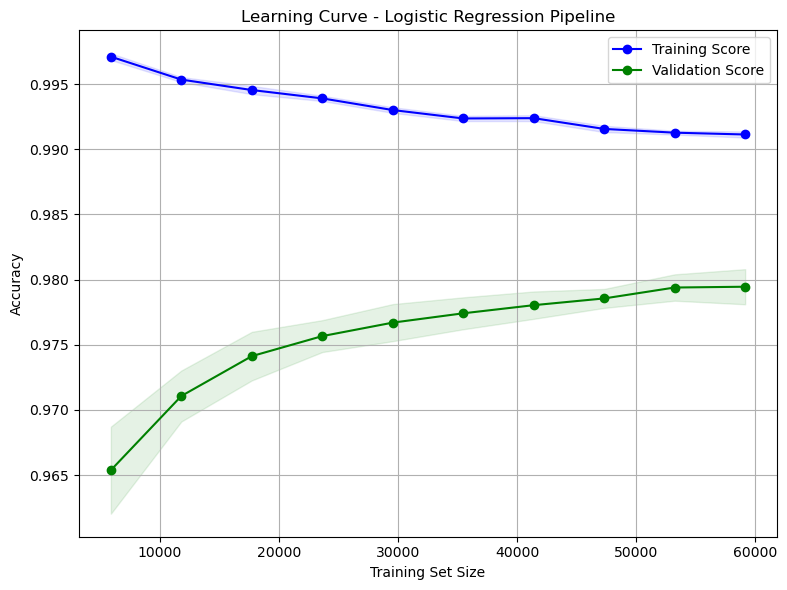

In [5]:
#Logistic Regression Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= LogisticRegression,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/LogisticRegression_learning_curve.png', dpi=300)
plt.show()

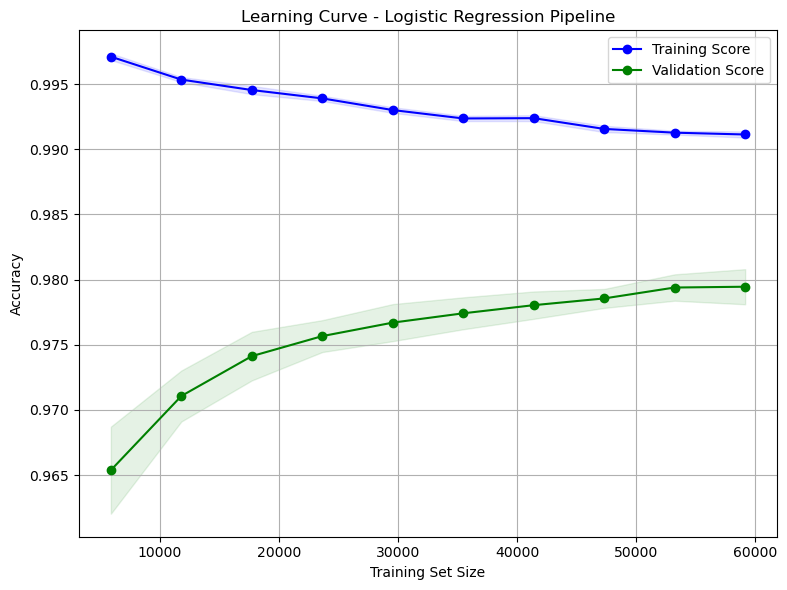

In [6]:
#MLP Classifier Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MLPClassifier,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/MLPClassifier_learning_curve.png', dpi=300)
plt.show()

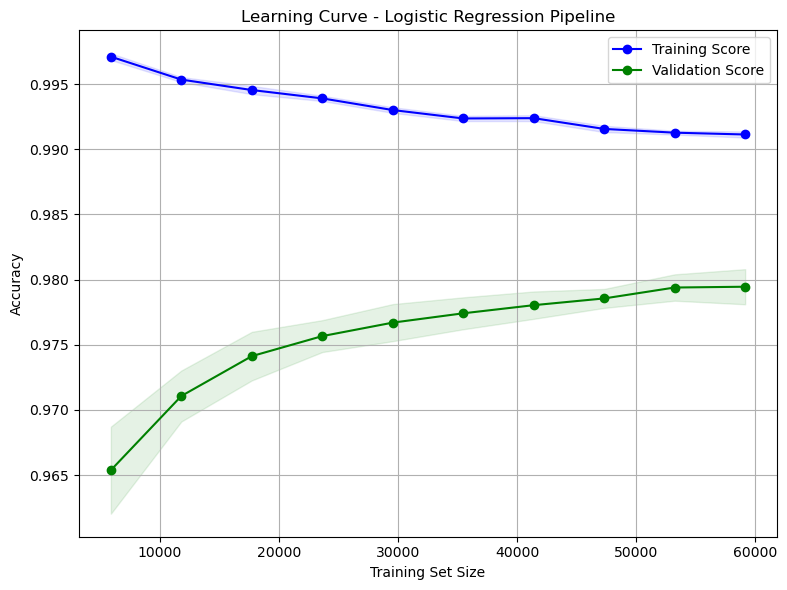

In [7]:
#MultinomialNB Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MultinomialNB,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/MultinomialNB_learning_curve.png', dpi=300)
plt.show()

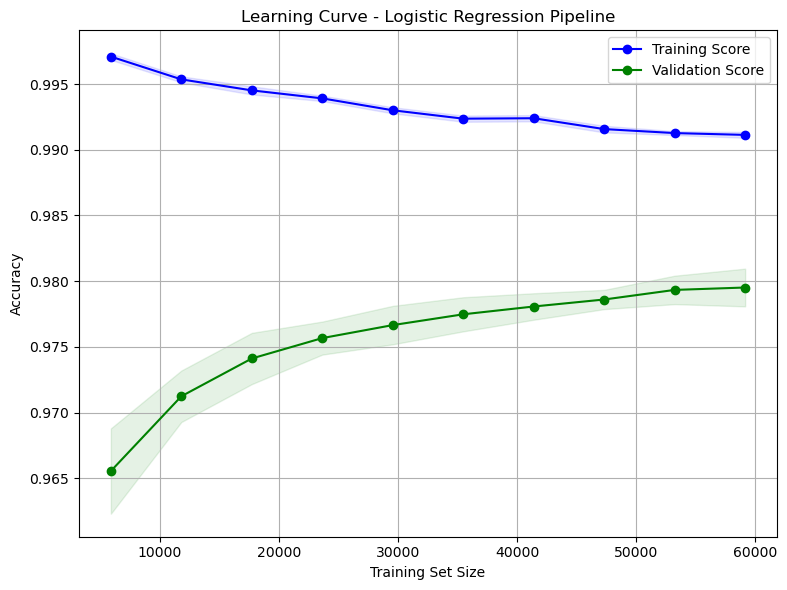

In [5]:
#RandomForest Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= RandomForest,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/RandomForest_learning_curve.png', dpi=300)
plt.show()

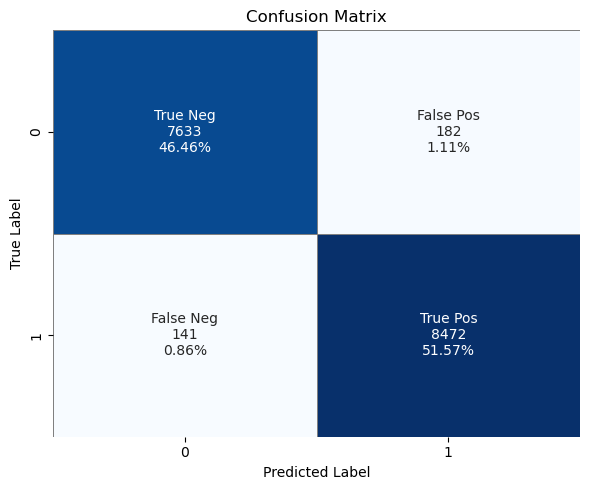

In [16]:
#Logistic Regression Confusion Matrix
y_pred = LogisticRegression.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/LogisticRegression_confusion_matrix.png', dpi=300)
plt.show()

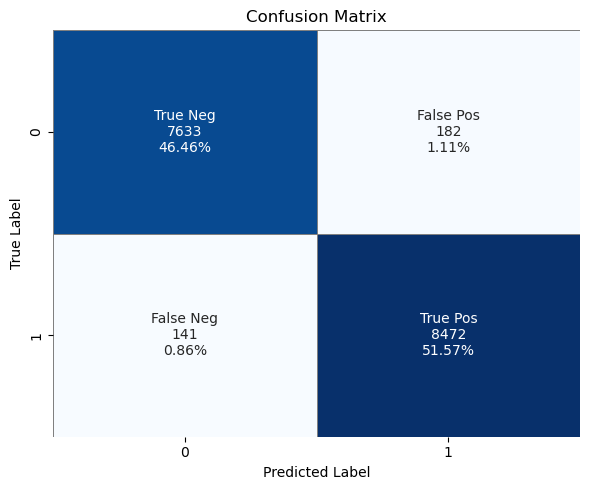

In [17]:
#MLP Classifier Confusion Matrix
y_pred = MLPClassifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/MLPClassifier_confusion_matrix.png', dpi=300)
plt.show()

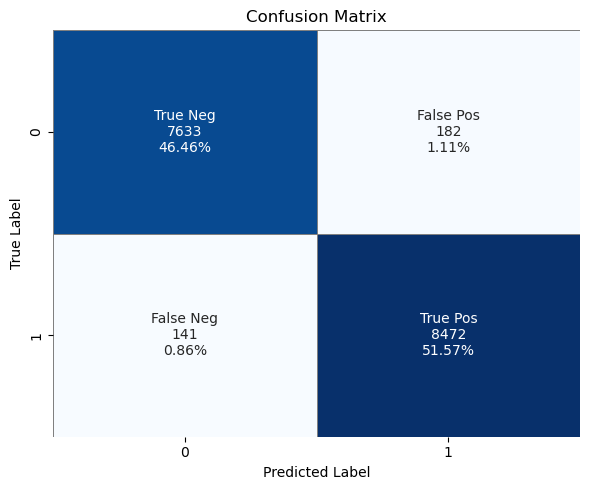

In [19]:
#MultinomialNB Confusion Matrix
y_pred = MultinomialNB.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/MultinomialNB_confusion_matrix.png', dpi=300)
plt.show()

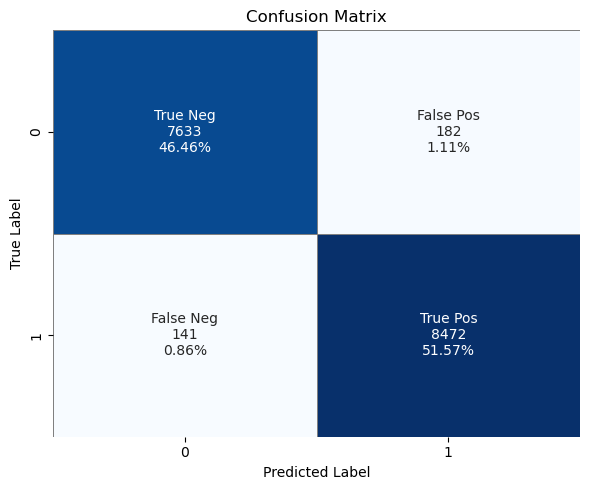

In [18]:
#RandomForest Confusion Matrix
y_pred = RandomForest.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/RandomForest_confusion_matrix.png', dpi=300)
plt.show()

In [ ]:
results = []
pipelines = {LogisticRegression, MultinomialNB, MLPClassifier, RandomForest}
for name, pipe in pipelines.items():
    print(f"Training {name}...")
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else None
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary'),
        "ROC-AUC": roc,
        "Training Time (s)": round(end - start, 2)
    })

# Show results
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
df_results.to_csv("../../output/results/model_comparison_results.csv", index=False)
print(df_results)
